In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import control as ct

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
%matplotlib nbagg
# only needed when developing python-control
%load_ext autoreload
%autoreload 2

## Define continuous system

In [3]:
# Distillation column model as in Equation (3.81) of Multivariable Feedback Control, Skogestad and Postlethwaite, 2st Edition.

den = [75, 1]
G = ct.tf([[[87.8], [-86.4]],
          [[108.2], [-109.6]]],
         [[den, den],
          [den, den]])
display(G)

TransferFunction([[array([87.8]), array([-86.4])], [array([108.2]), array([-109.6])]], [[array([75,  1]), array([75,  1])], [array([75,  1]), array([75,  1])]])

## Define sampled system

In [4]:
sampleTime = 10
display('Nyquist frequency: {:.4f} Hz, {:.4f} rad/sec'.format(1./sampleTime /2., 2*sp.pi*1./sampleTime /2.))

'Nyquist frequency: 0.0500 Hz, 0.3142 rad/sec'

In [5]:
# MIMO discretization not implemented yet...

Gd11 = ct.sample_system(G[0, 0], sampleTime, 'tustin')
Gd12 = ct.sample_system(G[0, 1], sampleTime, 'tustin')
Gd21 = ct.sample_system(G[1, 0], sampleTime, 'tustin')
Gd22 = ct.sample_system(G[1, 1], sampleTime, 'tustin')

Gd = ct.tf([[Gd11.num[0][0], Gd12.num[0][0]],
            [Gd21.num[0][0], Gd22.num[0][0]]],
           [[Gd11.den[0][0], Gd12.den[0][0]],
            [Gd21.den[0][0], Gd22.den[0][0]]], dt=Gd11.dt)
Gd

TransferFunction([[array([5.4875, 5.4875]), array([-5.4, -5.4])], [array([6.7625, 6.7625]), array([-6.85, -6.85])]], [[array([ 1.   , -0.875]), array([ 1.   , -0.875])], [array([ 1.   , -0.875]), array([ 1.   , -0.875])]], 10)

## Draw Singular values plots

### Continuous-time system

<IPython.core.display.Javascript object>


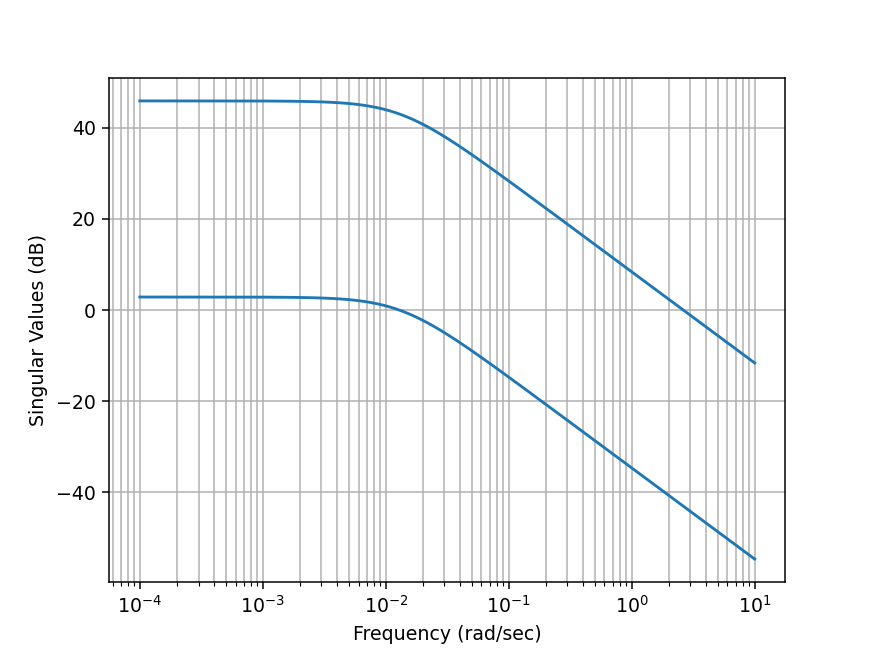

In [6]:
omega = np.logspace(-4, 1, 1000)
plt.figure()
sigma_ct, omega_ct = ct.freqplot.singular_values_plot(G, omega);

### Discrete-time system

<IPython.core.display.Javascript object>


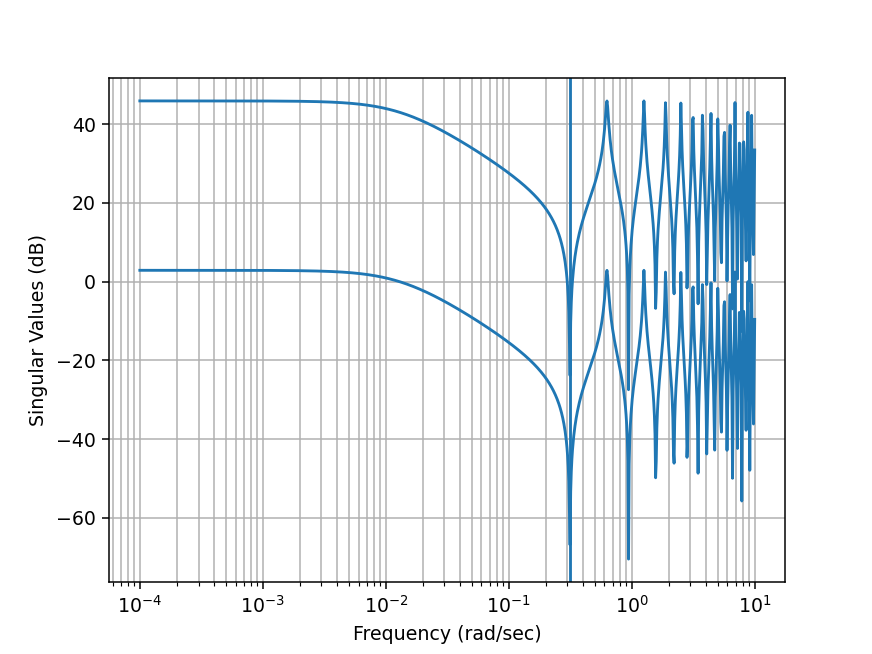

In [7]:
plt.figure()
sigma_dt, omega_dt = ct.freqplot.singular_values_plot(Gd, omega);

### Continuous-time and discrete-time systems altogether

<IPython.core.display.Javascript object>


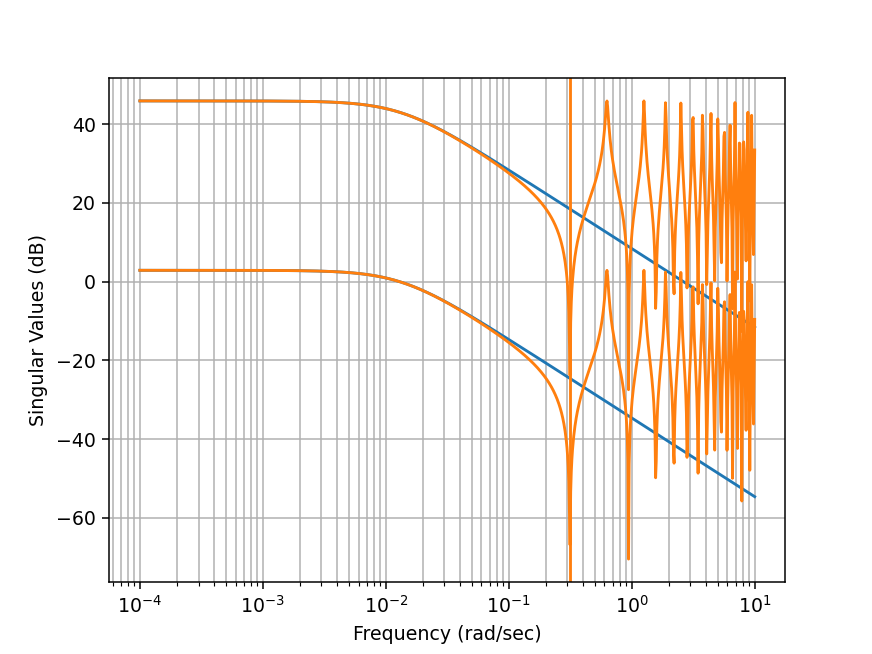

In [8]:
plt.figure()
ct.freqplot.singular_values_plot([G, Gd], omega);

### Analysis in DC

In [9]:
G_dc = np.array([[87.8, -86.4],
                 [108.2, -109.6]])

In [10]:
U, S, V = np.linalg.svd(G_dc)

In [12]:
S, sigma_ct[:, 0]

(array([197.20868123,   1.39141948]), array([197.20313497,   1.39138034]))